In [5]:
import os #se balader dans l'OS
import random
import sys
import cv2 #computer vision
import tqdm
import pandas as pd
import numpy as np #traduction des images en matrice
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

In [ ]:
folder_path = "../data_2"

In [9]:
# Train data preparation
classes = ["Negative","Cancer"]
dataset = []
for class_label in classes:
    class_path = os.path.join(folder_path,class_label)
    label_index = classes.index(class_label) # 0 for Negative, 1 for Cancer
    for img_file in tqdm.tqdm(os.listdir(class_path)):
        img_path = os.path.join(class_path,img_file)
        img = cv2.imread(img_path)
        img = cv2.resize(img,(224,224))
        dataset.append([img,label_index])

100%|██████████| 410/410 [00:00<00:00, 633.02it/s]


In [11]:
len(dataset)

820

In [13]:
X_images = []
y_images = []

for img, label in dataset:
    X_images.append(img)
    y_images.append(label)

X = np.array(X_images) / 255
y = np.array(y_images)

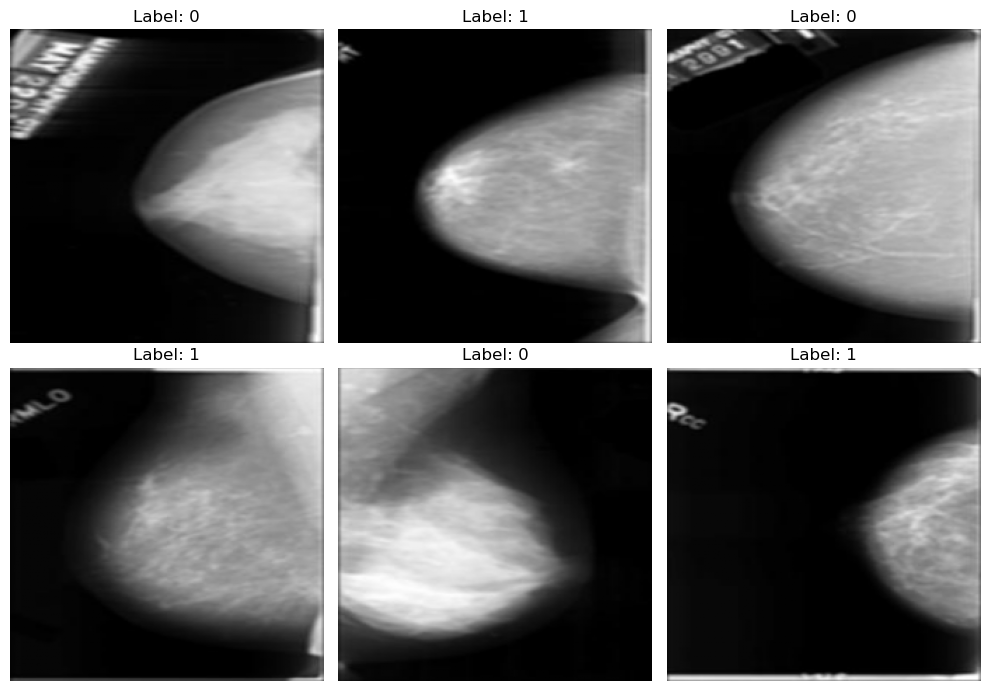

In [16]:
num_samples = 6
random_samples = np.random.choice(len(X), size = num_samples,replace=False)

fig,axes = plt.subplots(2,3,figsize=(10,7))
for i,idx in enumerate(random_samples):
     ax = axes[i//3,i%3]
     ax.imshow(X[idx],cmap="gray")
     ax.set_title(f"Label: {y[idx]}")
     ax.axis('off')

plt.tight_layout()
plt.show()

# Découpe en un jeu d'entrainement et un jeu de Test

In [17]:
 X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
#création d'une séquence de couches
model = Sequential()

model.add(Conv2D(32,(3,3),activation = 'relu' , input_shape = (224,224,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(100,(3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.2)) #20% des neurones sont éteints à chaque tour
model.add(Dense(1,activation = 'sigmoid')) #on connaîtra la proba que ce soit un cancer


model.summary()

2025-12-11 22:03:44.951645: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 100)       57700     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 100)      0

In [19]:
model.compile(optimizer = "adam",loss="binary_crossentropy", metrics = ["accuracy"])

In [20]:
history = model.fit(X_train,y_train,epochs=30, validation_data = (X_test,y_test))

Epoch 1/30
21/21 [==============================] - 47s 2s/step - loss: 0.6458 - accuracy: 0.6463 - val_loss: 0.4359 - val_accuracy: 0.8902
Epoch 2/30
21/21 [==============================] - 44s 2s/step - loss: 0.3724 - accuracy: 0.8582 - val_loss: 0.2718 - val_accuracy: 0.9085
Epoch 3/30
21/21 [==============================] - 40s 2s/step - loss: 0.2632 - accuracy: 0.8902 - val_loss: 0.3287 - val_accuracy: 0.8841
Epoch 4/30
21/21 [==============================] - 40s 2s/step - loss: 0.2098 - accuracy: 0.9162 - val_loss: 0.3012 - val_accuracy: 0.8841
Epoch 5/30
21/21 [==============================] - 40s 2s/step - loss: 0.1844 - accuracy: 0.9375 - val_loss: 0.2377 - val_accuracy: 0.9268
Epoch 6/30
21/21 [==============================] - 40s 2s/step - loss: 0.1597 - accuracy: 0.9436 - val_loss: 0.2534 - val_accuracy: 0.9146
Epoch 7/30
21/21 [==============================] - 40s 2s/step - loss: 0.1012 - accuracy: 0.9543 - val_loss: 0.2042 - val_accuracy: 0.9512
Epoch 8/30
21/21 [==

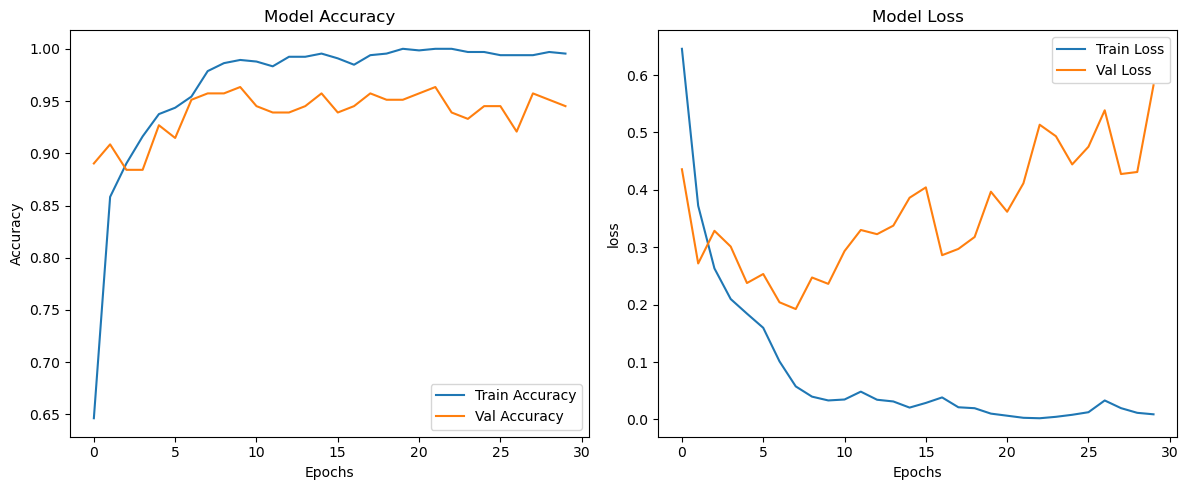

In [21]:
plt.figure(figsize=(12,5))

#Accuracy subplot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

#Loss subplot

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.tight_layout()
plt.show()

Modèle qui apprend bien mais qui a du mal à généraliser : overfitting. On a entraîné notre modèle depuis 0. On a peu d'images. Faire de la data augmentation, architecture du modèle...